In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("./data/iris.csv")
del df['Id']
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = df.drop('Species', axis = 1)
y = df.Species
print(X,y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns] 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-

In [5]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()

In [7]:
y = encoder.fit_transform(y)
print(y)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [13]:

scaler.fit(X_train)

MinMaxScaler()

In [14]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [30]:
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense

In [16]:
model = Sequential()
model.add(Dense(units=4,activation = 'relu', input_shape = [4,]))
model.add(Dense(units=10,activation = 'relu' ))
model.add(Dense(units=3,activation = 'softmax'))

In [17]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [18]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience = 15)

In [19]:
model.fit(x = scaled_X_train,y = y_train, epochs = 100, callbacks = [early_stop])

Epoch 1/100
120/120 [==============================] - 2s 15ms/step - loss: 1.0818 - accuracy: 0.3500
Epoch 2/100
120/120 [==============================] - 0s 113us/step - loss: 1.0808 - accuracy: 0.3500
Epoch 3/100
120/120 [==============================] - 0s 59us/step - loss: 1.0799 - accuracy: 0.3500
Epoch 4/100
120/120 [==============================] - 0s 52us/step - loss: 1.0791 - accuracy: 0.3500
Epoch 5/100
120/120 [==============================] - 0s 47us/step - loss: 1.0782 - accuracy: 0.3500
Epoch 6/100
120/120 [==============================] - 0s 64us/step - loss: 1.0771 - accuracy: 0.3500
Epoch 7/100
120/120 [==============================] - 0s 128us/step - loss: 1.0762 - accuracy: 0.3500
Epoch 8/100
120/120 [==============================] - 0s 110us/step - loss: 1.0754 - accuracy: 0.3500
Epoch 9/100
120/120 [==============================] - 0s 200us/step - loss: 1.0743 - accuracy: 0.3500
Epoch 10/100
120/120 [==============================] - 0s 136us/step - loss: 

/home/yash/Desktop/dl/dl/lib/python3.8/site-packages/keras/callbacks/callbacks.py:843: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  warnings.warn(


Epoch 17/100
120/120 [==============================] - 0s 92us/step - loss: 1.0659 - accuracy: 0.3500
Epoch 18/100
120/120 [==============================] - 0s 66us/step - loss: 1.0647 - accuracy: 0.3500
Epoch 19/100
120/120 [==============================] - 0s 46us/step - loss: 1.0635 - accuracy: 0.3500
Epoch 20/100
120/120 [==============================] - 0s 144us/step - loss: 1.0622 - accuracy: 0.3500
Epoch 21/100
120/120 [==============================] - 0s 133us/step - loss: 1.0607 - accuracy: 0.3500
Epoch 22/100
120/120 [==============================] - 0s 261us/step - loss: 1.0592 - accuracy: 0.3500
Epoch 23/100
120/120 [==============================] - 0s 119us/step - loss: 1.0577 - accuracy: 0.3500
Epoch 24/100
120/120 [==============================] - 0s 113us/step - loss: 1.0560 - accuracy: 0.3500
Epoch 25/100
120/120 [==============================] - 0s 53us/step - loss: 1.0541 - accuracy: 0.3500
Epoch 26/100
120/120 [==============================] - 0s 115us/ste

120/120 [==============================] - 0s 150us/step - loss: 0.7665 - accuracy: 0.7083
Epoch 97/100
120/120 [==============================] - 0s 129us/step - loss: 0.7629 - accuracy: 0.7083
Epoch 98/100
120/120 [==============================] - 0s 137us/step - loss: 0.7595 - accuracy: 0.7083
Epoch 99/100
120/120 [==============================] - 0s 55us/step - loss: 0.7560 - accuracy: 0.7083
Epoch 100/100
120/120 [==============================] - 0s 62us/step - loss: 0.7527 - accuracy: 0.7083


In [20]:
metrics = pd.DataFrame(model.history.history)

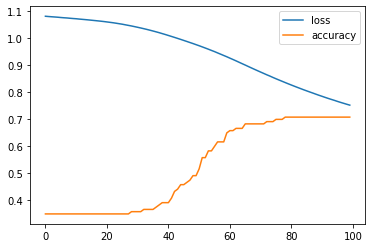

In [21]:
metrics[['loss','accuracy']].plot()

In [22]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.8009539842605591, 0.6333333253860474]

In [23]:
scaled_X = scaler.fit_transform(X)

In [24]:
model = Sequential()
model.add(Dense(units=4,activation = 'relu', input_shape = [4,]))
model.add(Dense(units=10,activation = 'relu' ))
model.add(Dense(units=3,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [25]:
model.fit(scaled_X,y,epochs = 200)

Epoch 1/200
150/150 [==============================] - 0s 480us/step - loss: 1.1826 - accuracy: 0.3333
Epoch 2/200
150/150 [==============================] - 0s 93us/step - loss: 1.1619 - accuracy: 0.3200
Epoch 3/200
150/150 [==============================] - 0s 92us/step - loss: 1.1419 - accuracy: 0.3333
Epoch 4/200
150/150 [==============================] - 0s 95us/step - loss: 1.1222 - accuracy: 0.3400
Epoch 5/200
150/150 [==============================] - 0s 128us/step - loss: 1.1032 - accuracy: 0.3400
Epoch 6/200
150/150 [==============================] - 0s 129us/step - loss: 1.0844 - accuracy: 0.3400
Epoch 7/200
150/150 [==============================] - 0s 240us/step - loss: 1.0666 - accuracy: 0.3467
Epoch 8/200
150/150 [==============================] - 0s 123us/step - loss: 1.0490 - accuracy: 0.3600
Epoch 9/200
150/150 [==============================] - 0s 167us/step - loss: 1.0323 - accuracy: 0.3800
Epoch 10/200
150/150 [==============================] - 0s 240us/step - loss

150/150 [==============================] - 0s 104us/step - loss: 0.4155 - accuracy: 0.8067
Epoch 158/200
150/150 [==============================] - 0s 32us/step - loss: 0.4144 - accuracy: 0.8067
Epoch 159/200
150/150 [==============================] - 0s 88us/step - loss: 0.4136 - accuracy: 0.8067
Epoch 160/200
150/150 [==============================] - 0s 143us/step - loss: 0.4127 - accuracy: 0.7867
Epoch 161/200
150/150 [==============================] - 0s 121us/step - loss: 0.4115 - accuracy: 0.8000
Epoch 162/200
150/150 [==============================] - 0s 123us/step - loss: 0.4105 - accuracy: 0.8067
Epoch 163/200
150/150 [==============================] - ETA: 0s - loss: 0.4138 - accuracy: 0.84 - 0s 122us/step - loss: 0.4096 - accuracy: 0.8200
Epoch 164/200
150/150 [==============================] - 0s 114us/step - loss: 0.4083 - accuracy: 0.8200
Epoch 165/200
150/150 [==============================] - 0s 58us/step - loss: 0.4073 - accuracy: 0.8200
Epoch 166/200
150/150 [=======

In [26]:
model.save('./model/iris.h5')

In [27]:
import joblib
joblib.dump(scaler,'./scaler/iris_scaler.pkl')

['./scaler/iris_scaler.pkl']

In [12]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
flower_model = load_model('./model/iris.h5')
flower_scaler = joblib.load("./scaler/iris_scaler.pkl")

In [28]:
flower_temp = {"sepal_length":5.1,
              "sepal_width":3.5,
              "petal_length":1.4,
              "petal_width":0.2}

In [37]:
encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

In [38]:
 def return_prediction(model,scaler,sample_json):
        s_len = sample_json["sepal_length"]
        s_wid = sample_json["sepal_width"]
        p_len = sample_json["petal_length"]
        p_wid = sample_json["petal_width"]
        classes = np.array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
        flower = [[s_len,s_wid,p_len,p_wid]]
        flower = scaler.transform(flower)
        class_ind = model.predict_classes(flower)[0]
        return classes[class_ind]

In [39]:
return_prediction(flower_model, flower_scaler,flower_temp)

'Iris-setosa'